<a href="https://colab.research.google.com/github/saroshkhawaja/Data-Science-Ecosystem/blob/main/Project_9_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/content/sample_data/automobile_dataset (1).xlsx')

In [ ]:
df.head()

,Make and model,Price,Mileage (mpg),Repair record 1978,Headroom (in.),Trunk space (cu. ft.),Weight (lbs.),Length (in.),Turn circle (ft.),Displacement (cu. in.),Gear ratio,Car origin
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


**Step 1: Data Loading and Initial Exploration (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Display the first few rows
print(df.head())

# Get information about the data types and missing values
print(df.info())

# Summary statistics for numerical features
print(df.describe())

  Make and model  Price  Mileage (mpg)  Repair record 1978  Headroom (in.)  \
0    AMC Concord   4099             22                 3.0             2.5   
1      AMC Pacer   4749             17                 3.0             3.0   
2     AMC Spirit   3799             22                 NaN             3.0   
3  Buick Century   4816             20                 3.0             4.5   
4  Buick Electra   7827             15                 4.0             4.0   

   Trunk space (cu. ft.)  Weight (lbs.)  Length (in.)  Turn circle (ft.)  \
0                     11           2930           186                 40   
1                     11           3350           173                 40   
2                     12           2640           168                 35   
3                     16           3250           196                 40   
4                     20           4080           222                 43   

   Displacement (cu. in.)  Gear ratio Car origin  
0                     1

**Step 2: Exploratory Data Analysis (EDA)**

**Handling Missing Value: **



In [ ]:
df.dropna(inplace=True)  # Drop rows with any NaN values
print(df.isnull().sum()) # Check if any null values exist

Make and model            0
Price                     0
Mileage (mpg)             0
Repair record 1978        0
Headroom (in.)            0
Trunk space (cu. ft.)     0
Weight (lbs.)             0
Length (in.)              0
Turn circle (ft.)         0
Displacement (cu. in.)    0
Gear ratio                0
Car origin                0
dtype: int64


**Visualizations:**

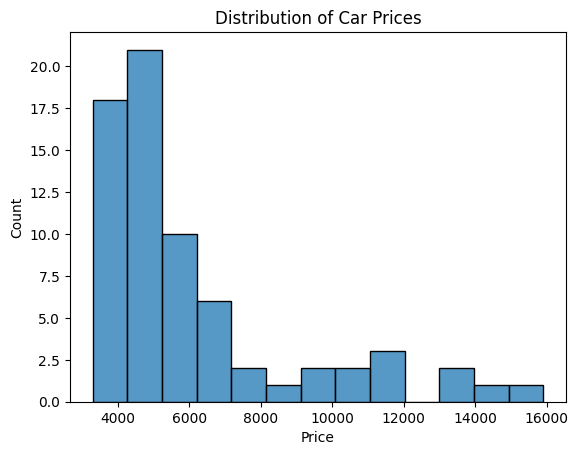

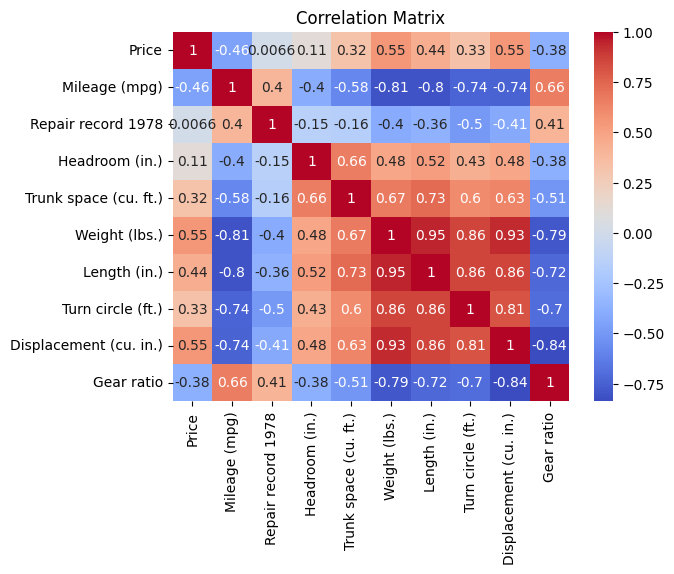

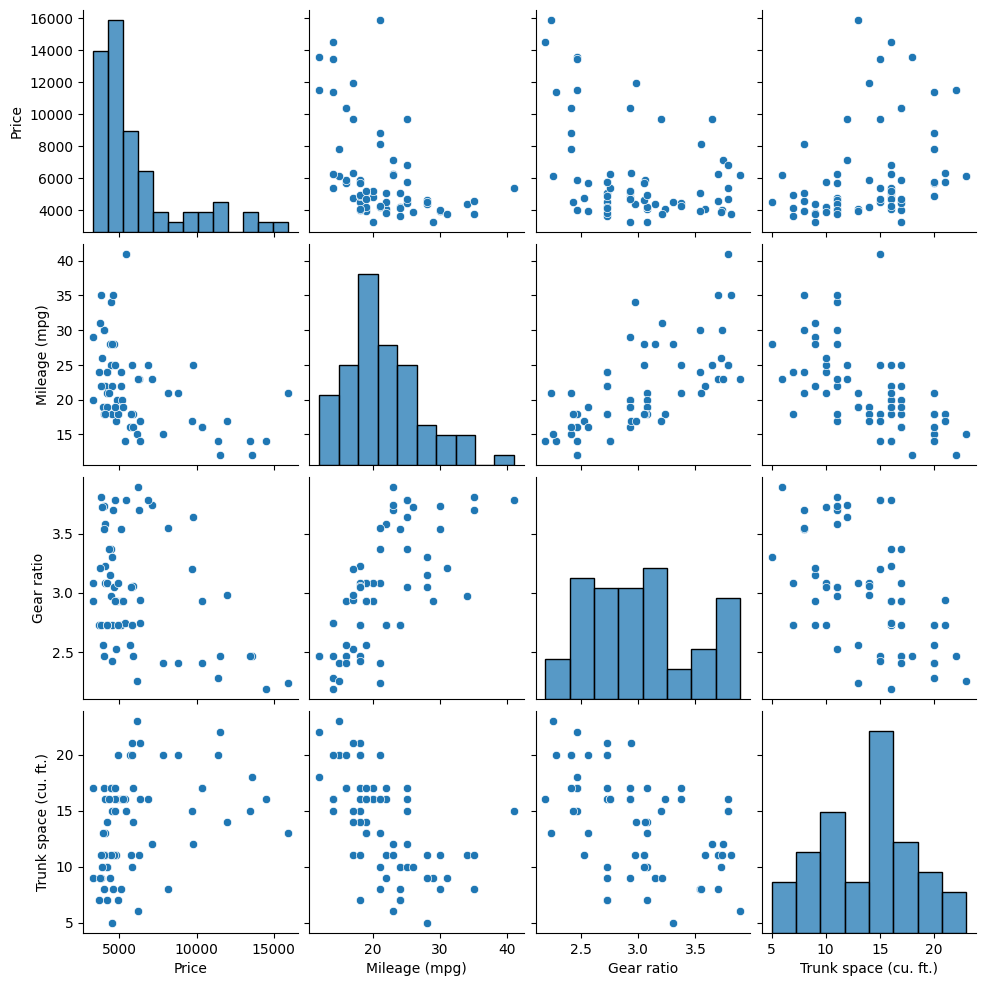

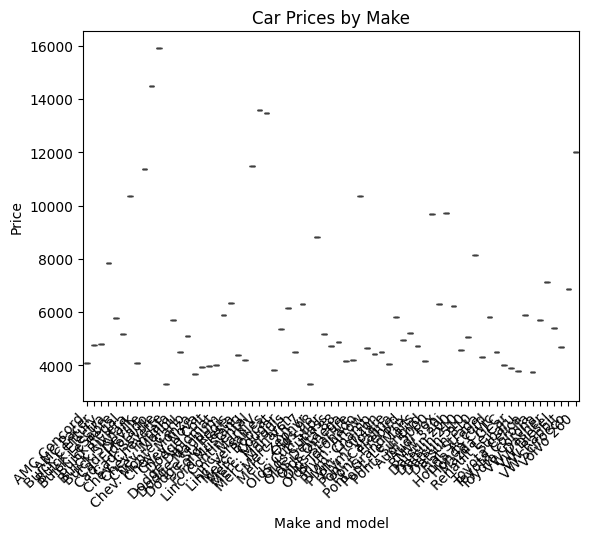

In [ ]:
# Distribution of the target variable (price)
sns.histplot(df['Price'])
plt.title('Distribution of Car Prices')
plt.show()

# Correlation matrix (only for numeric features)
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots to explore relationships between features and price
sns.pairplot(df[['Price', 'Mileage (mpg)', 'Gear ratio', 'Trunk space (cu. ft.)']]) # Example features
plt.show()

# Box plots to see the distribution of price for different categorical features
sns.boxplot(x='Make and model', y='Price', data=df)  # Example: make vs. price
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Car Prices by Make')
plt.show()

**Categorical Feature Analysis:**

In [ ]:
# Unique values and their counts for categorical features
print(df['Make and model'].value_counts())
print(df['Car origin'].value_counts())
print(df['Repair record 1978'].value_counts())
# ... other categorical features

Make and model
AMC Concord       1
Pont. Firebird    1
BMW 320i          1
Audi Fox          1
Audi 5000         1
                 ..
Merc. Monarch     1
Merc. XR-7        1
Merc. Zephyr      1
Olds 98           1
Volvo 260         1
Name: count, Length: 69, dtype: int64
Car origin
Domestic    48
Foreign     21
Name: count, dtype: int64
Repair record 1978
3.0    30
4.0    18
5.0    11
2.0     8
1.0     2
Name: count, dtype: int64


**Step 3: Feature Engineering**
**Creating 'brand' from 'make':**

In [ ]:
df['brand'] = df['Make and model']  # Simple for now, could be more complex later
df.drop('Make and model', axis=1, inplace=True) # Drop the original 'make' column

**One-Hot Encoding Categorical Features:**

In [ ]:
df = pd.get_dummies(df, columns=['Headroom (in.)', 'Trunk space (cu. ft.)', 'Displacement (cu. in.)', 'Car origin', 'brand'])

In [ ]:
df.head()

,Price,Mileage (mpg),Repair record 1978,Weight (lbs.),Length (in.),Turn circle (ft.),Gear ratio,Headroom (in.)_1.5,Headroom (in.)_2.0,Headroom (in.)_2.5,...,brand_Renault Le Car,brand_Subaru,brand_Toyota Celica,brand_Toyota Corolla,brand_Toyota Corona,brand_VW Dasher,brand_VW Diesel,brand_VW Rabbit,brand_VW Scirocco,brand_Volvo 260
0,4099,22,3.0,2930,186,40,3.58,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,4749,17,3.0,3350,173,40,2.53,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4816,20,3.0,3250,196,40,2.93,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7827,15,4.0,4080,222,43,2.41,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,5788,18,3.0,3670,218,43,2.73,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Numerical Feature Scaling **

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Mileage (mpg)', 'Repair record 1978', 'Gear ratio', 'Length (in.)', 'Turn circle (ft.)', 'Weight (lbs.)']  # Add other relevant numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

**Step 4: Model Training and Evaluation**

In [ ]:
# Define features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import evaluation metrics

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}


results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  R-squared: {metrics['R-squared']:.2f}")

Linear Regression:
  MSE: 10718243.13
  R-squared: 0.25
Decision Tree:
  MSE: 4001189.64
  R-squared: 0.72
Random Forest:
  MSE: 5983494.95
  R-squared: 0.58


**Step 5: Model Tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # For scaling numerical features (important!)

# Defining features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)  # Initialize the model

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print(f"  MSE: {mse_dt:.2f}")
print(f"  R-squared: {r2_dt:.2f}")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
y_pred_tuned_dt = best_dt_model.predict(X_test)
mse_tuned_dt = mean_squared_error(y_test, y_pred_tuned_dt)
r2_tuned_dt = r2_score(y_test, y_pred_tuned_dt)

print("\nTuned Decision Tree Regressor:")
print(f"  MSE: {mse_tuned_dt:.2f}")
print(f"  R-squared: {r2_tuned_dt:.2f}")

print("Best Hyperparameters:", grid_search.best_params_)

Decision Tree Regressor:
  MSE: 4001189.64
  R-squared: 0.72

Tuned Decision Tree Regressor:
  MSE: 1557645.86
  R-squared: 0.89
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
